# 데이터 선언 및 전처리

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import urllib.request
import re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [32]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", 
                           filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", 
                           filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7f960dfa8c50>)

In [33]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [34]:
train_data[:5]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [35]:
test_data[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [36]:
len(train_data), len(test_data)

(150000, 50000)

In [37]:
train_data.isnull().sum()

id          0
document    5
label       0
dtype: int64

In [38]:
train_data.loc[train_data.document.isnull()]

,id,document,label
25857,2172111,NaN,1
55737,6369843,NaN,1
110014,1034280,NaN,0
126782,5942978,NaN,0
140721,1034283,NaN,0


In [39]:
train_data.document.nunique()

146182

In [40]:
train_data.drop_duplicates(subset=['document'], inplace=True)

In [41]:
len(train_data)

146183

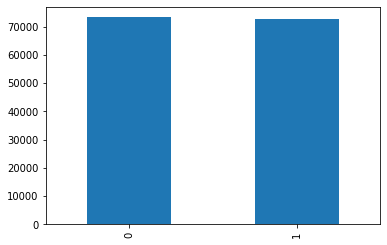

In [42]:
train_data.label.value_counts().plot(kind='bar')

In [43]:
train_data.groupby('label').size().reset_index(name='count')

,label,count
0,0,73342
1,1,72841


In [44]:
train_data.isnull().sum()

id          0
document    1
label       0
dtype: int64

In [45]:
train_data = train_data.dropna(how='any')
print(train_data.isnull().values.any())

False


In [46]:
len(train_data)

146182

In [47]:
train_data['document'] = train_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
# 한글과 공백을 제외하고 모두 제거
train_data[:5]


,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [48]:
train_data.document.replace('', np.nan, inplace=True)
print(train_data.isnull().sum())

id            0
document    391
label         0
dtype: int64


In [49]:
train_data = train_data.dropna(how='any')
len(train_data)

145791

In [74]:
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", 
                           filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", 
                           filename="ratings_test.txt")


('ratings_test.txt', <http.client.HTTPMessage at 0x7f95fea325d0>)

In [75]:
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [76]:
train_data[:5]

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [77]:
test_data[:5]

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [78]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [79]:
train_data.document.nunique()

146182

In [80]:
train_data.drop_duplicates(subset=['document'], inplace=True)

In [81]:
len(train_data)

146183

In [82]:
train_data.isnull().sum()

id          0
document    1
label       0
dtype: int64

In [83]:
train_data = train_data.dropna(how='any')
len(train_data)

146182

In [84]:
train_data['document'] = train_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣 ]',
                                                       '')
train_data[:5]

,id,document,label
0,9976970,아 더빙 진짜 짜증나네요 목소리,0
1,3819312,흠포스터보고 초딩영화줄오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 솔직히 재미는 없다평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화스파이더맨에서 늙어보이기만 했던 커스틴 던...,1


In [85]:
train_data['document'].replace('', np.nan, inplace=True)

In [87]:
train_data.isnull().sum()

id            0
document    391
label         0
dtype: int64

In [88]:
train_data = train_data.dropna(how='any')

In [89]:
len(train_data)

145791

In [93]:
train_data.isnull().sum()

id          0
document    0
label       0
dtype: int64

In [94]:
test_data.drop_duplicates(subset=['document'], inplace=True)
test_data = test_data.dropna(how='any')
test_data['document'] = test_data['document'].str.replace('[^ㄱ-ㅎㅏ-ㅣ가-힣]',
                                                         '')
test_data.replace('', np.nan, inplace=True)
test_data = test_data.dropna(how='any')


/Users/chw/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/chw/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4172: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  method=method,


In [95]:
len(test_data)

48852

In [96]:
test_data.isnull().sum()

id          0
document    0
label       0
dtype: int64

# 토큰화

In [97]:
stopwords = ['의','가','이','은','들','는',
             '좀','잘','걍','과','도','를','으로','자','에','와','한','하다']



In [99]:
okt = Okt()
okt.morphs('와 이런 것도 영화라고 만들었냐', stem=True)

['오다', '이렇다', '것', '도', '영화', '라고', '만들다']

In [100]:
X_train = []
for sentence in train_data['document']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if not word in stopwords]
    X_train.append(temp_X)

In [102]:
X_test = []
for sentence in test_data['document']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True)
    temp_X = [word for word in temp_X if word not in stopwords]
    X_test.append(temp_X)

# 정수 인코딩

In [103]:
t = Tokenizer()

In [104]:
t.fit_on_texts(X_train)

In [108]:
threshold = 3
total_cnt = len(t.word_index)
rare_cnt = 0
total_freq = 0
rare_freq = 0

for key, value in t.word_counts.items():
    total_freq = total_freq + value
    
    if value < threshold:
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value
        
print('단어 집합의 크기: ', total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s' %(threshold-1, rare_cnt))
print('단어 집합에서 희귀 단어의 비율: ', (rare_cnt / total_cnt)*100)
print('전체 단어 빈도 수에서 희귀 단어 빈도 수의 비율: ', (rare_freq / total_freq)*100)


단어 집합의 크기:  43752
등장 빈도가 2번 이하인 희귀 단어의 수: 24337
단어 집합에서 희귀 단어의 비율:  55.62488571950996
전체 단어 빈도 수에서 희귀 단어 빈도 수의 비율:  1.8715872104872904


In [109]:
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기: ', vocab_size)

단어 집합의 크기:  19417


In [111]:
t = Tokenizer(vocab_size, oov_token="OOV")
t.fit_on_texts(X_train)
X_train = t.texts_to_sequences(X_train)
X_test = t.texts_to_sequences(X_test)

In [112]:
y_train = np.array(train_data['label'])
y_test = np.array(test_data['label'])

# 빈 셈플 제거

In [115]:
drop_train = [index for index, sentence \
             in enumerate(X_train) if len(sentence) < 1]

In [116]:
X_train = np.delete(X_train, drop_train, axis=0)
y_train = np.delete(y_train, drop_train, axis=0)

print(len(X_train)), print(len(y_train))

145380
145380


(None, None)

# 패딩

리뷰의 최대 길이:  72
리뷰의 평균 길이:  11.002187371027652


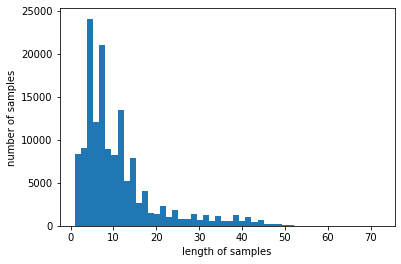

In [119]:
len_review = [len(l) for l in X_train]
print('리뷰의 최대 길이: ', np.max(len_review))
print('리뷰의 평균 길이: ', np.mean(len_review))
plt.hist(len_review, bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [126]:
def below_threshold_len(max_len, nested_list):
    cnt = 0
    for s in nested_list:
        if(len(s) <= max_len):
            cnt += 1
    print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s' %(max_len, 
                                          (cnt / len(nested_list))*100 ))

In [129]:
max_len = 30
below_threshold_len(max_len, X_train)

전체 샘플 중 길이가 30 이하인 샘플의 비율: 94.0830925849498


In [130]:
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)

In [132]:
X_train.shape, X_test.shape

((145380, 30), (48852, 30))

# LSTM modeling

In [133]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [134]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [136]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('best_model.h5', monitor='val_acc', mode='max',
                    verbose=1, save_best_only=True)

In [137]:
model.compile(optimizer='adam',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(X_train, y_train, epochs=15,
                   callbacks=[es, mc], batch_size=60,
                   validation_split=0.2)

Epoch 1/15
1938/1939 [============================>.] - ETA: 0s - loss: 0.3863 - acc: 0.8255
Epoch 00001: val_acc improved from -inf to 0.84771, saving model to best_model.h5
1939/1939 [==============================] - 77s 39ms/step - loss: 0.3863 - acc: 0.8255 - val_loss: 0.3486 - val_acc: 0.8477
Epoch 2/15
1939/1939 [==============================] - ETA: 0s - loss: 0.2962 - acc: 0.8724
Epoch 00002: val_acc improved from 0.84771 to 0.85225, saving model to best_model.h5
1939/1939 [==============================] - 75s 39ms/step - loss: 0.2962 - acc: 0.8724 - val_loss: 0.3410 - val_acc: 0.8522
Epoch 3/15
1939/1939 [==============================] - ETA: 0s - loss: 0.2460 - acc: 0.8966
Epoch 00003: val_acc did not improve from 0.85225
1939/1939 [==============================] - 76s 39ms/step - loss: 0.2460 - acc: 0.8966 - val_loss: 0.3626 - val_acc: 0.8510
Epoch 4/15
1939/1939 [==============================] - ETA: 0s - loss: 0.2033 - acc: 0.9163
Epoch 00004: val_acc did not improve

In [138]:
loaded_model = load_model('best_model.h5')
print('\n 테스트 정확도: %.4f' %(loaded_model.evaluate(X_test, y_test)[1]))

1527/1527 [==============================] - 8s 5ms/step - loss: 0.3599 - acc: 0.8397

 테스트 정확도: 0.8397


# 리뷰 예측하기

In [145]:
def sentiment_predict(new_sentence):
    new_sentence = okt.morphs(new_sentence, stem=True)
    new_sentence = [word for word in new_sentence if word not in stopwords]
    encoded = t.texts_to_sequences([new_sentence])
    pad_new = pad_sequences(encoded, maxlen=max_len)
    score = float(loaded_model.predict(pad_new))
    if score > 0.5:
        print('{:.2f}% 확률로 긍정 리뷰입니다. \n'.format(score*100))
    else:
        print('{:.2f}% 확률로 부정 리뷰입니다. \n'.format((1 - score)*100))
    

In [150]:
sentiment_predict('예측')

79.64% 확률로 부정 리뷰입니다. 



In [151]:
sentiment_predict('이게 영화?')

66.14% 확률로 부정 리뷰입니다. 



In [152]:
sentiment_predict('재미없다')

98.25% 확률로 부정 리뷰입니다. 



In [153]:
sentiment_predict('밥이나 먹자')

85.27% 확률로 부정 리뷰입니다. 

